# Перетворення Лагера

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import unittest

In [2]:
def integral(f, a, b):
    x = np.linspace(a, b, 1000)
    s = sum([f(i) for i in x])
    return s * abs(b - a) / 1000

Функція integral обчислює визначений інтеграл функції f на відрізку [a, b] за допомогою чисельної апроксимації методом прямокутників.

## 1.5.1

In [3]:
class Laguerre:
    def __init__(self, beta=2, sigma=4):
        self.beta = beta
        self.sigma = sigma

    @property
    def beta(self):
        return self._beta
    
    @beta.setter
    def beta(self, value):
        if value < 0:
            raise ValueError("beta must be greater than 0")
        self._beta = value

    @property
    def sigma(self):
        return self._sigma
    
    @sigma.setter
    def sigma(self, value):
        if value < 0:
            raise ValueError("sigma must be greater than 0")
        self._sigma = value

    def polynomial(self, t, n):
        prev_prev = np.sqrt(self.sigma) * np.exp(-self.beta * t / 2)
        prev = np.sqrt(self.sigma) * (1 - self.sigma * t) * np.exp(-self.beta * t / 2)

        if n == 0:
            return prev_prev
        if n == 1:
            return prev

        for i in range(2, n + 1):
            temp = prev
            prev = (2 * i - 1 - self.sigma * t) * prev / i - (i - 1) * prev_prev / i
            prev_prev = temp

        return prev
    
    def tabulate_polynomial(self, n, max_t):
        T = np.arange(0, max_t, 0.1)
        return pd.DataFrame(
            data={
                't': T,
                f'L{n}': [self.polynomial(t, n) for t in T]
            }
        ).set_index('t')

    def experiment(self, max_n=20, eps=1e-3, max_t=100):
        T = np.linspace(0, max_t, 1000)
        N = range(0, max_n + 1)
        result = None
        for t in T:
            condition_met = True
            for n in N:
                if abs(self.polynomial(t, n)) > eps:
                    condition_met = False
                    break
            if condition_met and result is None:
                result = t
                break

        return result, pd.DataFrame(
            data={
                'n': N,
                'Ln': [self.polynomial(result, n) for n in N]
            }
        ).set_index('n')
    
    def plot(self, max_t, n_max): 
        plt.figure(figsize=(8, 8))
        
        for n in range(0, n_max + 1):
            l_n_tabulation = self.tabulate_polynomial(n, max_t)
            plt.plot(l_n_tabulation.index, l_n_tabulation[f'L{n}'], label=f'L_{n}')

        plt.title('функції Лагера')
        plt.xlabel('t')
        plt.legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.15, 1)) 
        plt.show()

In [4]:
class TestLaguerre(unittest.TestCase):
    def setUp(self):
        self.laguerre = Laguerre()
    
    def test_polynomial(self):
        self.assertEqual(self.laguerre.polynomial(0, 0), 2.0)
        self.assertEqual(self.laguerre.polynomial(1, 1), -2.207276647028654)
        self.assertEqual(self.laguerre.polynomial(2, 2), 4.601399630044832)
        self.assertEqual(self.laguerre.polynomial(3, 3), -10.654432630722884)
        self.assertEqual(self.laguerre.polynomial(99, 4), 1.989487650928675e-34)
    
    def test_tabulate_polynomial(self):
        self.assertEqual(self.laguerre.tabulate_polynomial(0, 1).shape, (10, 1))
        self.assertEqual(self.laguerre.tabulate_polynomial(1, 1).shape, (10, 1))
        self.assertEqual(self.laguerre.tabulate_polynomial(2, 1).shape, (10, 1))
        self.assertEqual(self.laguerre.tabulate_polynomial(99, 99).shape, (990, 1))

    def test_experiment(self):
        self.assertEqual(self.laguerre.experiment(20, 1e-3, 100)[0], 79.07907907907908)
        
    def tearDown(self):
        del self.laguerre


unittest.main(argv=[''], verbosity=2, exit=False)

test_experiment (__main__.TestLaguerre.test_experiment) ... ok
test_polynomial (__main__.TestLaguerre.test_polynomial) ... ok
test_tabulate_polynomial (__main__.TestLaguerre.test_tabulate_polynomial) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.210s

OK


In [5]:
laguerre = Laguerre(2, 4)
laguerre.polynomial(1, 3)

1.7167707254667308

Клас Laguerre реалізує метод для обчислення функцій Лагерра для заданого аргументу (t) та порядку (n). Параметри beta і sigma впливають на форму функцій.     
* Якщо n = 0, повертається початкове значення prev_prev, якщо n=1 повертається prev.    
* В інших випадках використовується цикл для обчислення значень функцій.

## 1.5.2

In [6]:
laguerre.tabulate_polynomial(2, 20)

,L2
t,
0.0,2.000000
0.1,0.506709
0.2,-0.458489
0.3,-1.007513
0.4,-1.233389
...,...
19.5,0.000020
19.6,0.000018
19.7,0.000016


Цей метод створює таблицю значень функцій Лагерра порядку n на відрізку аргументу t Є [0, max_t) з кроком 0.1, використовуючи pandas DataFrame.

## 1.5.3

In [7]:
t, df = laguerre.experiment()
print(t)
df

79.07907907907908


,Ln
n,
0,9.066138e-35
1,-2.858701e-32
2,4.478343e-30
3,-4.647081e-28
4,3.593209e-26
5,-2.208132e-24
6,1.123332e-22
7,-4.865604e-21
8,1.831625e-19


Метод experiment визначає найменший аргумент t, коли всі функції Лагерра до порядку max_n стають меншими за eps. 
Результати представлені у формі DataFrame для значень функцій при визначеному аргументі t.

## 1.5.4

In [8]:
class LaguerreTransform(Laguerre):
    def __init__(self, beta=2, sigma=4):
        super().__init__(beta, sigma)

    def transform(self, f, max_n):
        def integrated_function(t):
            return f(t) * self.polynomial(t, max_n) * np.exp(-t * (self.sigma - self.beta))

        max_t, df = self.experiment(max_n)

        return integral(integrated_function, 0, max_t)
    
    def tabulate_transform(self, f, max_n):
        N = range(0, max_n)
        return pd.DataFrame(
            data={
                'n': N,
                f'Ln': [self.transform(f, n) for n in N]  
            }
        ).set_index('n')

In [9]:
class TestLaguerreTransform(unittest.TestCase):
    def setUp(self):
        self.laguerre_transform = LaguerreTransform()
    
    def test_transform(self):
        self.assertEqual(self.laguerre_transform.transform(lambda x: x, 1), -0.3700217204327907)
        self.assertEqual(self.laguerre_transform.transform(lambda x: np.exp(x), 2), 1.0144962448978252)
    
    def test_tabulate_transform(self):
        self.assertEqual(self.laguerre_transform.tabulate_transform(lambda x: x, 1).shape, (1, 1))
        self.assertEqual(self.laguerre_transform.tabulate_transform(lambda x: x, 2).shape, (2, 1))
        self.assertEqual(self.laguerre_transform.tabulate_transform(lambda x: x, 3).shape, (3, 1))
        self.assertEqual(self.laguerre_transform.tabulate_transform(lambda x: x, 4).shape, (4, 1))
        
    def tearDown(self):
        del self.laguerre_transform


unittest.main(argv=[''], verbosity=2, exit=False)

test_experiment (__main__.TestLaguerre.test_experiment) ... ok
test_polynomial (__main__.TestLaguerre.test_polynomial) ... ok
test_tabulate_polynomial (__main__.TestLaguerre.test_tabulate_polynomial) ... ok
test_tabulate_transform (__main__.TestLaguerreTransform.test_tabulate_transform) ... ok
test_transform (__main__.TestLaguerreTransform.test_transform) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.318s

OK


In [10]:
def f(t):
    if 0 <= t <= 2 * np.pi:
        return np.sin(t - np.pi / 2) + 1
    else:
        return 0

In [11]:
laguerre_transform = LaguerreTransform(2, 4)
laguerre_transform.transform(f, 10)

-0.00023693574195226422

Клас LaguerreTransform містить методи, що обчислюють перетворення Лагерра для заданої функції f та максимального порядку функції Лагерра max_n. Використовує чисельний метод інтегрування для оцінки визначеного інтегралу. Параметри beta та sigma впливають на форму функцій Лагерра.

## 1.5.5

In [12]:
laguerre_transform.tabulate_transform(f, 20)

,Ln
n,
0,0.066600
1,-0.182040
2,0.177896
3,-0.074216
4,0.007256
5,0.007581
6,-0.003094
7,-0.000615
8,0.000798


Створює DataFrame із значеннями перетворених функцій Лагерра порядку n, використовуючи функцію f, для порядків від 0 до max_n - 1.

## 1.5.6

In [13]:
class InverseLaguerreTransform(Laguerre):
    def __init__(self, beta=2, sigma=4):
        super().__init__(beta, sigma)

    def inverse_transform(self, h, t):
        return sum([h[k] * self.polynomial(t, k) for k in range(0, len(h))])

In [14]:
class TestInverseLaguerreTransform(unittest.TestCase):
    def setUp(self):
        self.inverse_laguerre_transform = InverseLaguerreTransform()
    
    def test_inverse_transform(self):
        self.assertEqual(self.inverse_laguerre_transform.inverse_transform([1, 2, 3], 1), -1.4715177646857693)
        self.assertEqual(self.inverse_laguerre_transform.inverse_transform([1, 2, 3], 2), 10.285481525982567)
        self.assertEqual(self.inverse_laguerre_transform.inverse_transform([1, 2, 3], 3), 12.546341228701714)
        self.assertEqual(self.inverse_laguerre_transform.inverse_transform([1, 2, 3], 4), 9.59739477769671)
        
    def tearDown(self):
        del self.inverse_laguerre_transform


unittest.main(argv=[''], verbosity=2, exit=False)

test_inverse_transform (__main__.TestInverseLaguerreTransform.test_inverse_transform) ... ok
test_experiment (__main__.TestLaguerre.test_experiment) ... ok
test_polynomial (__main__.TestLaguerre.test_polynomial) ... ok
test_tabulate_polynomial (__main__.TestLaguerre.test_tabulate_polynomial) ... ok
test_tabulate_transform (__main__.TestLaguerreTransform.test_tabulate_transform) ... ok
test_transform (__main__.TestLaguerreTransform.test_transform) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.314s

OK


Метод класу InverseLaguerreTransform виконує обернене перетворення Лагерра для заданих коефіцієнтів h та аргументу t, використовуючи суму коефіцієнтів, помножених на відповідні функції Лагерра.

In [15]:
h = laguerre_transform.tabulate_transform(f, 20)['Ln'].tolist()

inverse_laguerre_transform = InverseLaguerreTransform(2, 4)
inverse_laguerre_transform.inverse_transform(h, 2)

1.4147315957539512

## 1.5.7

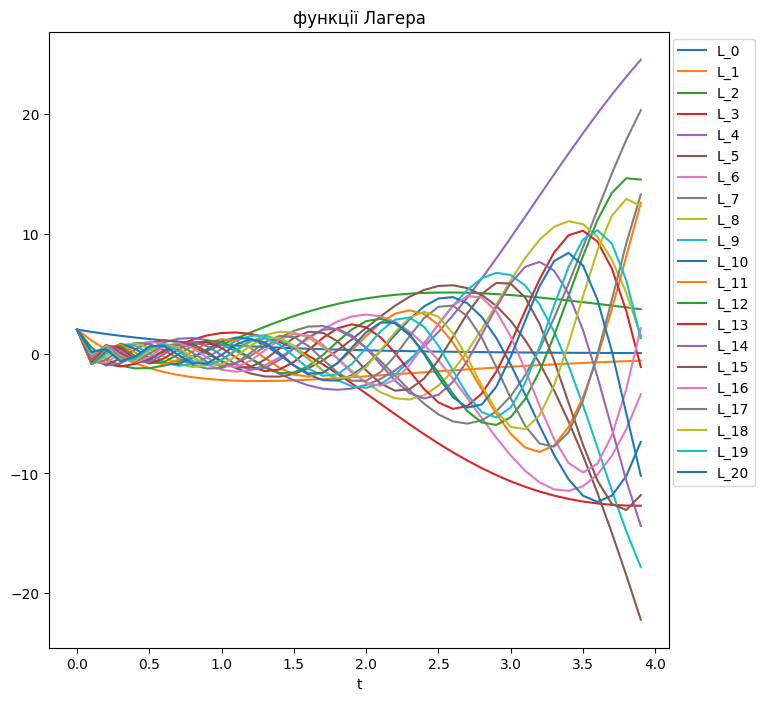

In [16]:
laguerre.plot(4, 20)

Візуалізації функцій Лагерра до заданого порядку n_max на відрізку аргументу t Є [0, max_t].      
Кожна функція Лагерра відображається на графіку окремо.

In [17]:
widgets.interact(
    laguerre.plot,
    max_t=widgets.FloatSlider(min=0, max=10, step=0.1, value=4),
    n_max=widgets.IntSlider(min=0, max=20, step=1, value=20)
)

interactive(children=(FloatSlider(value=4.0, description='max_t', max=10.0), IntSlider(value=20, description='…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

Створення слайдерів для зміни параметрів max_t та n_max у методі plot класу Laguerre.

## 1.5.8

In [18]:
def plot_laguerre_transform(f, max_n, max_t=np.pi * 2):
    laguerre_transform_tabulation_values = LaguerreTransform().tabulate_transform(f, max_n)
    h_values = laguerre_transform_tabulation_values['Ln'].tolist()

    T = np.arange(0, max_t, 0.1)
    inverse_laguerre_transform_tabulation_values = pd.DataFrame(
        data={
            't': T,
            'h': [InverseLaguerreTransform().inverse_transform(h_values, t) for t in T]
        }
    )

    plt.figure(figsize=(15, 5))
    plt.suptitle('Графіки перетворення Лагера')

    plt.subplot(1, 2, 1)
    plt.plot(
        laguerre_transform_tabulation_values.index,
        laguerre_transform_tabulation_values['Ln'],
    )
    plt.title('Перетворення Лагера')
    plt.xlabel('n')
    plt.ylabel('L_n')
    plt.grid()

    plt.subplot(1, 2, 2)
    initial_function_tabulation = pd.DataFrame(
        data={
            't': T,
            'f': [f(t) for t in T]
        }
    )
    plt.plot(
        initial_function_tabulation['t'],
        initial_function_tabulation['f'],
        label='Початкова функція',
    )

    plt.plot(
        inverse_laguerre_transform_tabulation_values['t'],
        inverse_laguerre_transform_tabulation_values['h'],
        label='Обернене перетворення Лагера',
    )

    plt.title('Обернене перетворення Лагера')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.legend()
    plt.grid()

    plt.show()

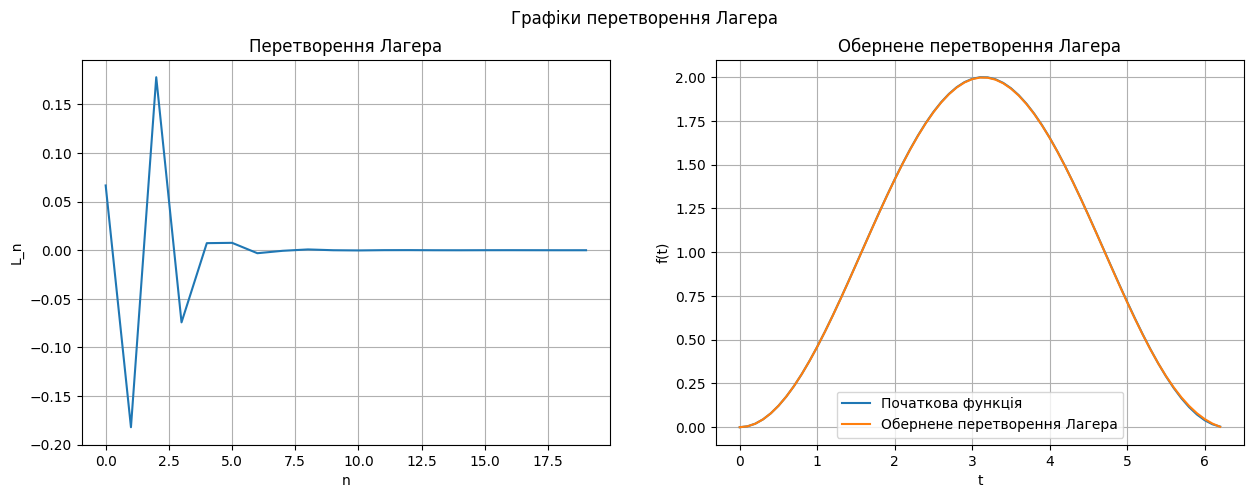

In [19]:
plot_laguerre_transform(f, 20)

In [20]:
widgets.interact(
    plot_laguerre_transform,
    f=widgets.fixed(f),
    max_n=widgets.IntSlider(min=0, max=20, step=1, value=20),
    max_t=widgets.FloatSlider(min=0, max=10, step=0.1, value=4),
)

interactive(children=(IntSlider(value=20, description='max_n', max=20), FloatSlider(value=4.0, description='ma…

<function __main__.plot_laguerre_transform(f, max_n, max_t=6.283185307179586)>

In [21]:
def my_function(t):
    return np.sqrt(t) * np.exp(t)

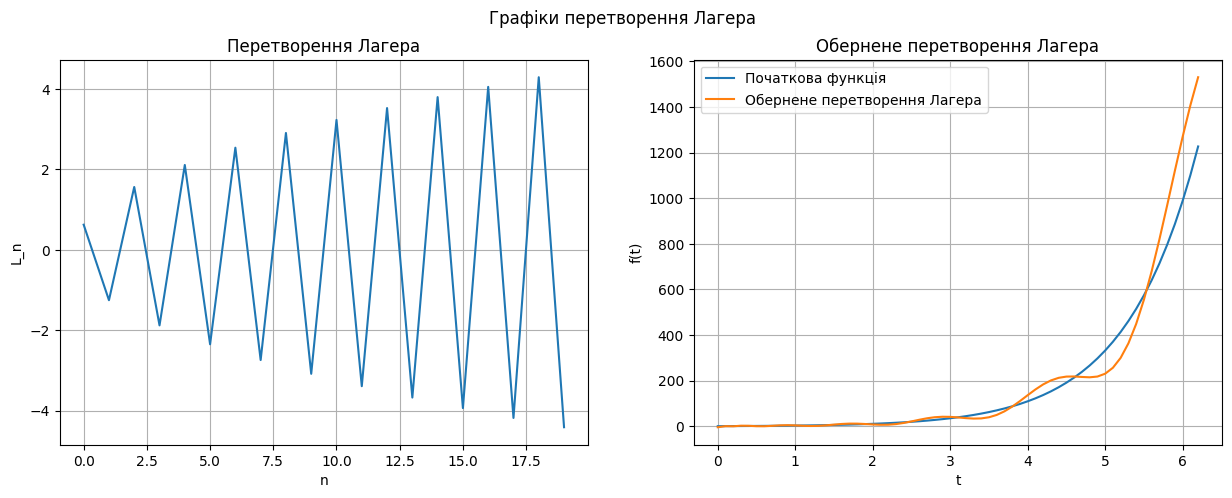

In [22]:
plot_laguerre_transform(my_function, 20)

In [23]:
widgets.interact(
    plot_laguerre_transform,
    f=widgets.fixed(my_function),
    max_n=widgets.IntSlider(min=0, max=20, step=1, value=20),
    max_t=widgets.FloatSlider(min=0, max=10, step=0.1, value=4),
)

interactive(children=(IntSlider(value=20, description='max_n', max=20), FloatSlider(value=4.0, description='ma…

<function __main__.plot_laguerre_transform(f, max_n, max_t=6.283185307179586)>

Функція plot_laguerre_transform відображає графіки перетворення Лагерра та оберненого перетворення Лагерра для визначеної функції f та максимального порядку функції Лагерра max_n.       

Виводить два графіки:
* Перший графік відображає значення перетворення Лагерра для різних порядків n.
* Другий графік включає графіки початкової функції та оберненого перетворення Лагерра на одному графіку для порівняння.

Створено інтерактивні слайдери для зміни параметрів у функціях і відображення оновлених графіків.

### Висновок
Під час виконання цієї роботи я:

* Освоїла реалізацію,табулювання,трансформацію,обернене перетворення функцій Лагерра.

* Організувала візуалізацію результатів: Використовуючи бібліотеку matplotlib розробила функції laguerre_polynomials_plot та plot_laguerre_transform для графічного представлення функцій Лагерра та їхніх трансформацій.

* Провела тестування на власних функціях: Використовуючи функцію my_function, перевірила роботу алгоритмів на інших типах функцій.

* Оволоділа бібліотеками для обробки даних: Використовуючи бібліотеки NumPy та Pandas покращила навички роботи з масивами та табличними даними.

* Використовуючи інтерактивні віджети бібліотеки ipywidgets, створила зручний інтерфейс для зміни параметрів у функціях Лагера, що дозволяє одразу ж спостерігати за змінами у відображенні графіків цих фунцій відносно оновлених вхідних даних.

* Навчилася перетворювати файл типу ipynb у latex.

* Попрактикувалася у створені документу у програмі overleaf.
